In [69]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

In [70]:
match= pd.read_csv(r"C:\Users\giada\Desktop\PROGETTO LAB\data2021\match_finale.csv")

In [71]:
match.shape

(185764, 30)

In [72]:
match.head()

,tourney_id,match_id,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020/A/brisbane,300/2019-M020,105453,106421,6-4 3-6 6-2,3,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020/A/brisbane,299/2019-M020,106421,104542,7-6(6) 6-2,3,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020/A/brisbane,298/2019-M020,105453,104871,6-2 6-2,3,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020/A/brisbane,297/2019-M020,104542,200282,6-4 7-6(2),3,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020/A/brisbane,296/2019-M020,106421,105683,6-7(2) 6-3 6-4,3,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0


In [73]:
#vediamo match e se ha duplicati la chiave primaria
column_values = match[["match_id"]].values.ravel()
unique_values =  pd.unique(column_values)
unique_values.shape

(185764,)

In [74]:
match.isnull().sum()

tourney_id                 0
match_id                   0
winner_id                  0
loser_id                   0
score                    169
best_of                    0
round                      0
minutes               104430
w_ace                 103782
w_df                  103782
w_svpt                103782
w_1stIn               103782
w_1stWon              103782
w_2ndWon              103782
w_SvGms               103778
w_bpSaved             103782
w_bpFaced             103782
l_ace                 103782
l_df                  103782
l_svpt                103782
l_1stIn               103782
l_1stWon              103782
l_2ndWon              103782
l_SvGms               103778
l_bpSaved             103782
l_bpFaced             103782
winner_rank            19372
winner_rank_points     19388
loser_rank             35232
loser_rank_points      35248
dtype: int64

# Missing Values "score"

In [75]:
match["score"].value_counts()

6-3 6-4                  5367
6-3 6-2                  5252
6-4 6-4                  5193
6-2 6-2                  5089
6-3 6-3                  4836
                         ... 
4-6 7-6(8) 7-6(2)           1
6-2 0-6 [10-8]              1
7-6(5) 6-7(7) 6-3 6-2       1
7-6(9) 6-4 6-3              1
7-5 6-7(11) 6-1             1
Name: score, Length: 9705, dtype: int64

Poichè i valori di score sono molto particolari, è stato deciso di rimuovere tali missing values (cioè le righe corrispondenti). In quanto si correrebbe il rischio di assegnare punteggi sbagliati, magari invertiti per vincitori e perdenti

In [76]:
match.dropna(subset = ["score"], inplace=True)

In [77]:
match.isnull().sum()

tourney_id                 0
match_id                   0
winner_id                  0
loser_id                   0
score                      0
best_of                    0
round                      0
minutes               104262
w_ace                 103613
w_df                  103613
w_svpt                103613
w_1stIn               103613
w_1stWon              103613
w_2ndWon              103613
w_SvGms               103610
w_bpSaved             103613
w_bpFaced             103613
l_ace                 103613
l_df                  103613
l_svpt                103613
l_1stIn               103613
l_1stWon              103613
l_2ndWon              103613
l_SvGms               103610
l_bpSaved             103613
l_bpFaced             103613
winner_rank            19344
winner_rank_points     19360
loser_rank             35206
loser_rank_points      35222
dtype: int64

Poichè sono presenti delle colonne con più del 50% di valori null, si procederà a rimuoverle per continuare la nostra analisi

In [78]:
match.drop(columns=['minutes','w_ace', 
                    'w_df', 'w_svpt', 'w_1stIn', 
                    'w_1stWon', 'w_2ndWon', 'w_SvGms', 
                    'w_bpSaved', 'w_bpFaced', 'l_ace', 
                    'l_df', 'l_svpt', 'l_1stIn', 
                    'l_1stWon', 'l_2ndWon', 'l_SvGms', 
                    'l_bpSaved','l_bpFaced'], inplace=True)

## Controlliamo se ci sono persone che hanno giocato contro se stesse

In [79]:
match[match['winner_id'] == match['loser_id']]

,tourney_id,match_id,winner_id,loser_id,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
63691,2016-7182/C/happy valley ch,244/2016-7182,122059,122059,6-7(3) 6-4 6-2,3,Q1,1161.0,8.0,1161.0,8.0
66133,2016-7553/C/chengdu ch,261/2016-7553,105026,105026,6-0 6-0,3,Q1,509.0,71.0,509.0,71.0
66534,2016-7614/C/astana ch,249/2016-7614,105781,105781,6-1 6-3,3,Q1,741.0,28.0,741.0,28.0
123527,2018-W-WITF-UKR-02A-2018/15/chornomorsk $15k,6/2018-W-WITF-UKR-02A-2018,221371,221371,6-2 6-4,3,R32,NaN,NaN,NaN,NaN
125650,2019-W-ITF-AUS-04A-2019/15/w15 port pirie,15/2019-W-ITF-AUS-04A-2019,221862,221862,6-0 6-2,3,R32,NaN,NaN,NaN,NaN


Avendo pochi records, li rimuoviamo

In [80]:
match.drop(match[match['winner_id'] == match['loser_id']].index, inplace=True)

In [81]:
match[match['winner_id'] == match['loser_id']]

,tourney_id,match_id,winner_id,loser_id,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points


In [82]:
match.shape

(185590, 11)

In [83]:
match.isnull().sum()

tourney_id                0
match_id                  0
winner_id                 0
loser_id                  0
score                     0
best_of                   0
round                     0
winner_rank           19342
winner_rank_points    19358
loser_rank            35204
loser_rank_points     35220
dtype: int64

# Missing values: winner_rank, winner_rank_points, loser_rank, loser_rank_points

Vediamo le distribuzioni delle colonne, prima di gestire i missing values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191C783CFA0>]],
      dtype=object)

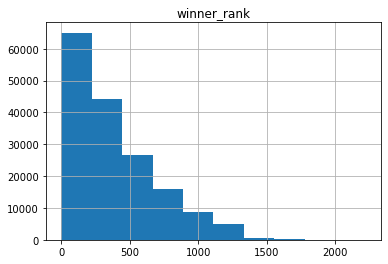

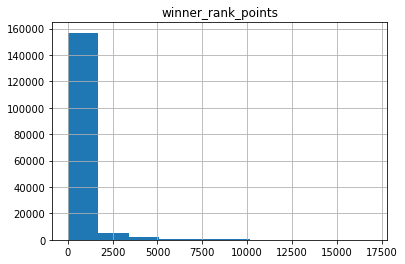

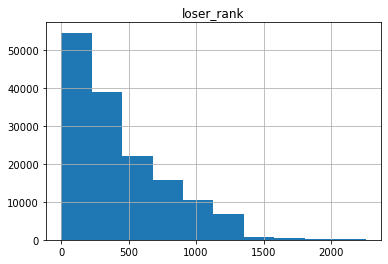

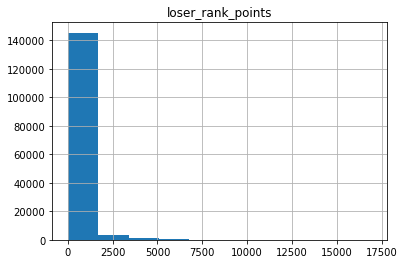

In [84]:
match.hist(column='winner_rank')
match.hist(column='winner_rank_points')
match.hist(column='loser_rank')
match.hist(column='loser_rank_points')

Importo "tournament" e "date" per riuscire a ricavare la colonna "year"

In [85]:
tournament= pd.read_csv(r"C:\Users\giada\Desktop\PROGETTO LAB\data2021\tournament_finale.csv")
date= pd.read_csv(r"C:\Users\giada\Desktop\PROGETTO LAB\data2021\date.csv")

In [86]:
tour=pd.merge(date, tournament, how='inner', left_on = 'date_id', right_on = 'date_id')

In [87]:
tour.head()

,date_id,day,month,year,quarter,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_spectators,tourney_revenue
0,20160815,15,8,2016,Quarter-3,2016-W-C10-AUT-03A-2016/10/graz $10k,Graz $10K,Clay,32,10,3315,748155.54
1,20160815,15,8,2016,Quarter-3,2016-W-C10-COL-01A-2016/10/medellin $10k,Medellin $10K,Clay,32,10,3908,695295.94
2,20160815,15,8,2016,Quarter-3,2016-W-C10-EGY-32A-2016/10/sharm el sheikh $10k,Sharm El Sheikh $10K,Hard,32,10,3057,701918.85
3,20160815,15,8,2016,Quarter-3,2016-W-C10-ESP-13A-2016/10/las palmas de gran ...,Las Palmas de Gran Canaria $10K,Clay,32,10,3001,753530.43
4,20160815,15,8,2016,Quarter-3,2016-W-C10-ITA-12A-2016/10/sezze $10k,Sezze $10K,Clay,32,10,2749,473311.56


Dopo aver effettuato la JOIN, vengono rimosse le colonne non necessarie, tenendo solo la colonna "year"

In [88]:
merged= pd.merge(match, tour, how='inner', left_on = 'tourney_id', right_on = 'tourney_id')
merged.drop(columns=['tourney_name','surface','draw_size',
                     'tourney_level','tourney_spectators',
                     'tourney_revenue','date_id','month','quarter','day'], inplace=True)

In [89]:
merged.head()

,tourney_id,match_id,winner_id,loser_id,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2019-M020/A/brisbane,300/2019-M020,105453,106421,6-4 3-6 6-2,3,F,9.0,3590.0,16.0,1977.0,2018
1,2019-M020/A/brisbane,299/2019-M020,106421,104542,7-6(6) 6-2,3,SF,16.0,1977.0,239.0,200.0,2018
2,2019-M020/A/brisbane,298/2019-M020,105453,104871,6-2 6-2,3,SF,9.0,3590.0,40.0,1050.0,2018
3,2019-M020/A/brisbane,297/2019-M020,104542,200282,6-4 7-6(2),3,QF,239.0,200.0,31.0,1298.0,2018
4,2019-M020/A/brisbane,296/2019-M020,106421,105683,6-7(2) 6-3 6-4,3,QF,16.0,1977.0,18.0,1855.0,2018


Per sostituire i missing values delle 4 colonne, viene effettuata una media, raggruppando per anno e id del giocatore. Questo perchè il rank rappresenta un insieme di punteggi ottenuti nell'anno passato da parte di un giocatore. 

In [90]:
match['winner_rank'] = merged.groupby(['year', 'winner_id'])['winner_rank'].transform(lambda x: x.fillna(x.mean()))

In [91]:
match['loser_rank'] = merged.groupby(['year', 'loser_id'])['loser_rank'].transform(lambda x: x.fillna(x.mean()))

In [92]:
match['winner_rank_points'] = merged.groupby(['year', 'winner_id'])['winner_rank_points'].transform(lambda x: x.fillna(x.mean()))

In [93]:
match['loser_rank_points'] = merged.groupby(['year', 'loser_id'])['loser_rank_points'].transform(lambda x: x.fillna(x.mean()))

Alcuni missing values non siano stati sostituiti, ciò potrebbe essere dovuta al fatto che per alcuni winner_id o loser_id non viene individuato nessuno winner_rank/loser_rank su cui fare la media. 

In [94]:
#il totale dei missing values rimasti è il seguente:
match.isnull().sum()

tourney_id                0
match_id                  0
winner_id                 0
loser_id                  0
score                     0
best_of                   0
round                     0
winner_rank           12131
winner_rank_points    12154
loser_rank            26869
loser_rank_points     26887
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191CDB14E80>]],
      dtype=object)

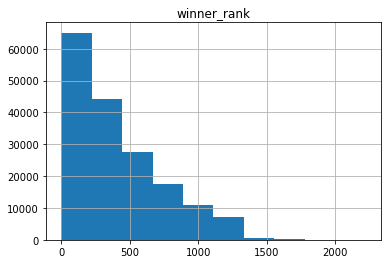

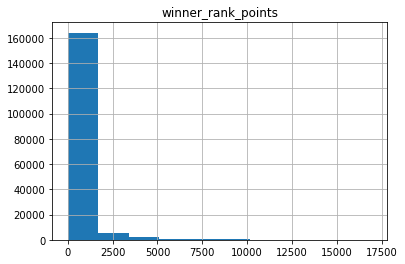

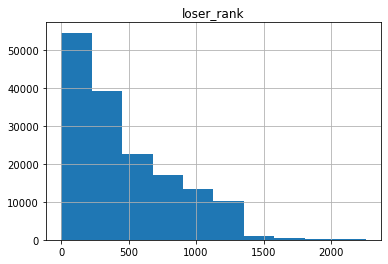

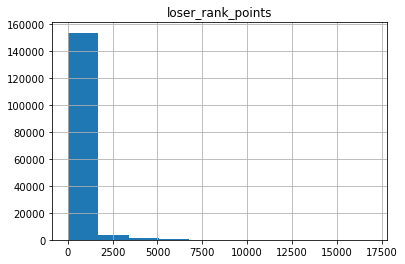

In [95]:
#vediamo le distribuzioni delle colonne con valori nulli
match.hist(column='winner_rank')
match.hist(column='winner_rank_points')
match.hist(column='loser_rank')
match.hist(column='loser_rank_points')

Per i restanti missing values, si procederà alla sostituzione con il valore "-1" nelle righe corrispondenti. 

In [96]:
match['winner_rank'] = match['winner_rank'].replace(np.nan, -1)
match['loser_rank'] = match['winner_rank'].replace(np.nan, -1)
match['winner_rank_points'] = match['winner_rank_points'].replace(np.nan, -1)
match['loser_rank_points'] = match['winner_rank_points'].replace(np.nan, -1)

In [97]:
match.isnull().sum()

tourney_id            0
match_id              0
winner_id             0
loser_id              0
score                 0
best_of               0
round                 0
winner_rank           0
winner_rank_points    0
loser_rank            0
loser_rank_points     0
dtype: int64

In [98]:
match.shape

(185590, 11)

##  Convertiamo i seguenti attributi in "Int"

In [99]:
match['best_of'] = match['best_of'].astype(int)
match['winner_rank'] = match['winner_rank'].astype(int)
match['loser_rank'] = match['winner_rank'].astype(int)
match['winner_rank_points'] = match['winner_rank_points'].astype(int)
match['loser_rank_points'] = match['winner_rank_points'].astype(int)

In [100]:
#salvare il dataset 
match.to_csv(r'C:\Users\giada\Desktop\PROGETTO LAB\tab da inserire\match_clean.csv', index = False, header = True)